In [ ]:
# !pip install gdown

In [ ]:
!gdown 1TB00fYubte_MTDwHFE1NMI-Sq7yHa6XH

!gdown 10DrenGquwpTo9OzeWgC55SpuizGCGfB_

Downloading...
From: https://drive.google.com/uc?id=1TB00fYubte_MTDwHFE1NMI-Sq7yHa6XH
To: /content/train.csv
100% 12.9M/12.9M [00:00<00:00, 165MB/s]
Downloading...
From: https://drive.google.com/uc?id=10DrenGquwpTo9OzeWgC55SpuizGCGfB_
To: /content/test.csv
100% 5.48M/5.48M [00:00<00:00, 197MB/s]


In [ ]:
# import gdown
# import pandas as pd

# 파일 공유 링크는 이와 같은 형식으로 함
# # Google 드라이브에서 train 데이터 파일의 공유 가능한 링크를 복사하여 아래에 붙여넣습니다.
# train_url = 1TB00fYubte_MTDwHFE1NMI-Sq7yHa6XH

# 밑과 같은 형식에서는 파일 인식을 못하기 때문에 위와 같은 형식으로만 해도 됨
# # Google 드라이브에서 test 데이터 파일의 공유 가능한 링크를 복사하여 아래에 붙여넣습니다.
# test_url = "https://drive.google.com/file/d/10DrenGquwpTo9OzeWgC55SpuizGCGfB_/view?usp=drive_link"

# # train 데이터 다운로드
# gdown.download(train_url, output="train.csv")

# # test 데이터 다운로드
# gdown.download(test_url, output="test.csv")

# # train 데이터와 test 데이터 불러오기
# train_data = pd.read_csv("train.csv")
# test_data = pd.read_csv("test.csv")

# # train 데이터와 test 데이터 확인
# print("Train 데이터:")
# print(train_data.head())

# print("Test 데이터:")
# print(test_data.head())


In [ ]:
import time
t0 = time.time()

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
from subprocess import check_output
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score

In [ ]:
dataset = pd.read_csv("train.csv")

dataset.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [ ]:
dataset.shape

(3609, 563)

In [ ]:
# 데이터 세트에서 특성을 추출하고 'rn' 및 'activity' 열을 제거하여 features를 만듭니다.
features=dataset.drop(['rn', 'activity'], axis = 1)
# 'activity' 열을 labels로 저장하여 데이터 포인트의 실제 레이블을 보유합니다.
labels=dataset['activity']

# 'activity' 열에서 고유한 레이블을 추출하여 Labels_keys에 저장하고, 이를 NumPy 배열로 변환하여 Labels를 만듭니다.
Labels_keys = labels.unique().tolist()
Labels = np.array(Labels_keys)
print(Labels)
# 각 레이블과 해당 인덱스를 매핑하는 딕셔너리 dict를 생성합니다.
dict = {}
for i in range(len(Labels)):
    dict[Labels[i]]=i
# 데이터 세트에서 누락된 값의 합계를 출력하여 데이터의 누락된 값 여부를 확인합니다.
print(dataset.isnull().sum())

['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64


In [ ]:
# 데이터의 스케일을 조정하는 데이터 정규화(Normalization)를 수행합니다.(다양한 특성 간의 스케일을 맞춰주어, 각 특성이 동일한 중요도를 가지게 함,모델의 수렴을 빠르게 하고 안정성을 높임, 이상치(Outliers)가 있는 경우, 이에 민감하지 않게 만들어줌)
features=(features-features.min())/(features.max()-features.min())

In [ ]:
# 데이터를 NumPy 배열로 변환하고, 각 데이터 포인트에 대한 레이블을 숫자로 변환합니다.
x = np.array(features).astype(float)
y = np.array([dict[i] for i in labels]).astype(int)
n_cluster = len(Labels)

# 데이터를 훈련 세트와 테스트 세트로 분할합니다. 데이터의 일부는 훈련을 위해 사용되고, 일부는 모델의 성능을 평가하기 위해 테스트에 사용됩니다.
m=len(x[0])
n=len(x)
def split(x,y,test_size):
    tot=len(x)
    t1=int(test_size*tot)
    arr = np.arange(tot)
    np.random.shuffle(arr)
    idtrain=arr[t1:]
    idtest=arr[:t1]
    print(len(idtrain),len(idtest),tot)
    print(idtrain,idtest)
    return x[idtrain],x[idtest],y[idtrain],y[idtest]

#Splitting the data into Train and Test
xtrain, xtest, ytrain, ytest = split(x,y,1/3)


def l2_norm(a, b):
    s=0
    for p in range(len(a)):
            s= s + (a[p] - b[p])**2
    return s

# K-Means 클러스터링 알고리즘을 구현한 kmeans 함수를 정의합니다. 이 함수는 주어진 데이터와 클러스터 수에 따라 K-Means 클러스터링을 수행합니다.
def kmeans(x,n_cluster):

    m=len(x[0])
    n=len(x)
    pred=np.zeros((n), dtype=int)

    kcase=0
    # K-Means 알고리즘을 여러 번 반복하여 중심(centroid)을 업데이트하고, 클러스터에 데이터 포인트를 할당합니다. 이 과정은 수렴할 때까지 반복됩니다.
    while(True):
        kcase+=1
        print("kcase =",kcase)
        if(kcase>1):
            centre = np.zeros((n_cluster,m) )
            n_points= np.zeros(n_cluster)
            for i in range(n):
                n_points[pred[i]]+=1
                centre[pred[i]]+=x[i]
            for i in range(n_cluster):
                if(n_points[i]>0):
                    centre[i]/=n_points[i]

                    flag=False

            for i in range(n):
                d=[np.linalg.norm(x[i]-centre[j]) for j in range(n_cluster)]
                minj=np.argmin(d)
                if(pred[i]!=minj):
                    pred[i]=minj
                    flag=True
            if(flag==False):
                break
        else:
            centre = np.zeros((n_cluster,m) )

            for j in range(m):
                minj = min(x[:, j])
                maxj = max(x[:, j])
                rangej = float(maxj-minj)
                centre[: ,j]=minj+rangej*np.random.rand(n_cluster)

            for i in range(n):
                d=[np.linalg.norm(x[i]-centre[j]) for j in range(n_cluster)]
                minj=np.argmin(d)
                pred[i]=minj

# K-Means 알고리즘은 클러스터링 결과로 각 데이터 포인트에 대한 클러스터 레이블을 반환합니다.
    return pred

2406 1203 3609
[1415  430 1130 ... 1317  226 1301] [3524 3005 1983 ... 3004 2623 1045]


In [ ]:
# 시각화를 위한 색상을 정의하는 작업
colors=['b','g','c','r','m','y','k','w']

kcase = 1
kcase = 2
kcase = 3
kcase = 4
kcase = 5
kcase = 6
kcase = 7
kcase = 8
kcase = 9
kcase = 10
kcase = 11
kcase = 12
kcase = 13
kcase = 14
kcase = 15
kcase = 16
kcase = 17
kcase = 18
kcase = 19
kcase = 20
kcase = 21
kcase = 22
kcase = 23
kcase = 24
kcase = 25
kcase = 26
kcase = 27
kcase = 28
kcase = 29
kcase = 30
kcase = 31
kcase = 32
kcase = 33
kcase = 34
kcase = 35
kcase = 36
kcase = 37
kcase = 38
kcase = 39
kcase = 40
kcase = 41
kcase = 42
kcase = 43
kcase = 44
kcase = 45
kcase = 46
kcase = 47
kcase = 48
kcase = 49
kcase = 50
kcase = 51
kcase = 52
kcase = 53
kcase = 54
kcase = 55
kcase = 56
kcase = 57
kcase = 58
kcase = 59
kcase = 60
kcase = 61
kcase = 62
kcase = 63
kcase = 64
kcase = 65
kcase = 66
kcase = 67
kcase = 68
kcase = 69
kcase = 70
kcase = 71
kcase = 72
kcase = 73
kcase = 74
kcase = 75
kcase = 76
kcase = 77
kcase = 78
kcase = 79
kcase = 80
kcase = 81
kcase = 82
kcase = 83
kcase = 84
kcase = 85
kcase = 86
kcase = 87
kcase = 88
kcase = 89
kcase = 90
kcase = 91
kcase = 

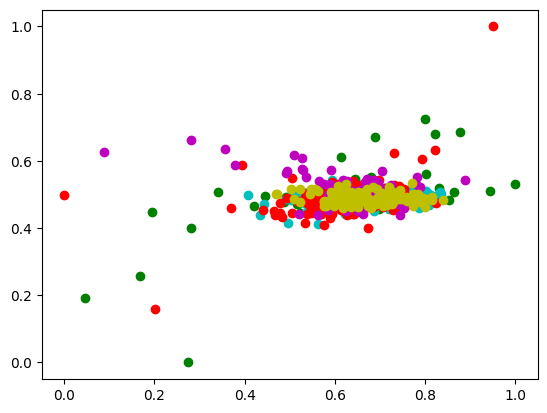

In [ ]:
# 클러스터링 결과 시각화
pred=kmeans(x,n_cluster)
for i in range(n_cluster):
    plt.scatter(x[np.where(pred==i)][:,0], x[np.where(pred==i)][:,1], c=colors[i])

In [ ]:
# 클러스터링 결과와 실제 레이블 간의 교차 테이블(crosstab)을 생성하고, 이를 hmap 배열에 저장하는 작업을 수행
hmap=np.zeros((n_cluster,n_cluster))
for i in range(n): hmap[y[i]][pred[i]]+=1

print(hmap)


[[  0.   0.   0.   5. 663.   0.]
 [  0.  19.   0.   5. 599.   0.]
 [  0. 677.   0.   4.   0.   0.]
 [  0.   0. 274. 295.   0.  34.]
 [  0.   0. 315.  64.   0. 114.]
 [  0.   0. 123. 412.   0.   6.]]


Text(50.722222222222214, 0.5, 'True label')

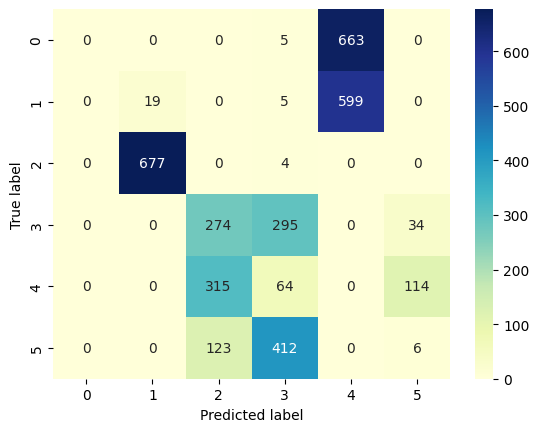

In [ ]:
# 클러스터와 실제 레이블 간의 crosstab 시각적으로 나타내는 작업
sns.heatmap(pd.DataFrame(hmap), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
# 프로그램의 실행 시간을 측정하여 출력하는 작업
t1 = time.time()
print(t1-t0, "seconds wall time")

23.744836807250977 seconds wall time


In [ ]:
#  주성분 분석(PCA)을 수행하는 함수를 정의, 이를 통해 데이터의 차원을 축소하고 주요 정보를 추출할 수 있음
def cov_mat(x):
    m = x.shape[0]
    x = x - np.mean(x, axis=0)
    return 1 / m * np.matmul(x.T, x)

def PCA(x, n_components):
    cov_matrix = cov_mat(x)
    eigval, eigvec = np.linalg.eig(cov_matrix)

    idx = eigval.argsort()[::-1]
    eigvec = eigvec[:, idx]
    eigvec = eigvec[:, :n_components]

    ans = np.matmul(x, eigvec)
    return ans

In [ ]:
# 주어진 데이터 x(주성분 분석을 적용하려는 데이터)에 대해 PCA를 수행함. 10은 주성분의 개수를 나타냄. 주성분 분석을 통해 데이터의 차원을 10차원으로 축소하는 작업을 수행.
x_pca = PCA(x, 10)

In [ ]:
# x_pca 변수에 저장된 PCA로 변환된 데이터는 복소수 형태일 수 있음. 하지만 일반적으로 PCA의 결과는 실수값으로 사용되는 것이 일반적. 따라서 x_pca를 실수값으로 변환하기 위해 .real 메서드를 사용
x_pca=x_pca.real

In [ ]:
x_pca

array([[-0.36844612,  0.42581834, -1.31421151, ...,  0.46661765,
         1.76600973,  0.22674541],
       [-0.26450432,  0.50229627, -1.26851564, ...,  0.44763705,
         1.63582747,  0.35776523],
       [-0.69532464,  1.33113358, -1.5182776 , ...,  0.01755026,
         1.69614625,  0.64509746],
       ...,
       [ 4.628989  , -0.68386849,  0.01346843, ...,  0.13596007,
         1.36659279,  1.04942955],
       [ 4.41358619, -0.68655126, -0.16322935, ...,  0.0725524 ,
         1.2447477 ,  0.84995766],
       [ 5.60312821,  0.56568809, -0.47567516, ...,  0.4503188 ,
         1.25279707,  0.57366752]])

In [ ]:
# x_pca에 저장된 PCA 변환된 데이터를 2차원으로 시각화하기 위해, 주성분 중에서 첫 번째 주성분과 두 번째 주성분을 선택하여 x1과 x2로 저장
# x_pca 데이터의 첫 번째 열(주성분)을 선택하여 x1 변수에 저장. 데이터의 첫 번째 주성분을 나타냄.
x1 = x_pca[:, 0]
# x_pca 데이터의 두 번째 열(주성분)을 선택하여 x2 변수에 저장. 데이터의 두 번째 주성분을 나타.
x2 = x_pca[:, 1]

In [ ]:
# pred_pca는 PCA로 변환된 데이터 x_pca에 K-Means 클러스터링을 적용한 결과를 저장하는 변수
pred_pca=kmeans(x_pca,n_cluster)

kcase = 1
kcase = 2
kcase = 3
kcase = 4
kcase = 5
kcase = 6
kcase = 7
kcase = 8
kcase = 9
kcase = 10
kcase = 11
kcase = 12
kcase = 13
kcase = 14
kcase = 15
kcase = 16


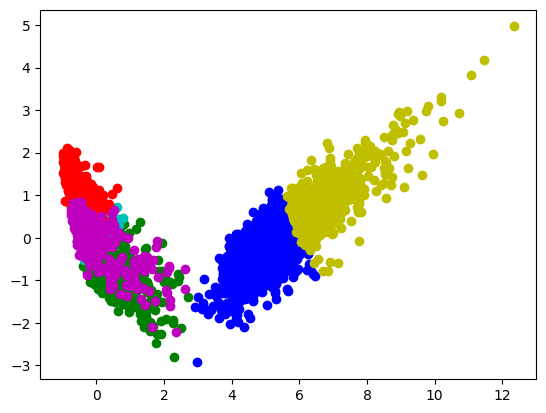

In [ ]:
# PCA로 차원 축소된 데이터를 시각화. 주어진 데이터를 K-Means 클러스터링을 통해 클러스터로 분류한 후, 각 클러스터를 다른 색상으로 시각화하여 표시.
for i in range(n_cluster):
    plt.scatter(x1[np.where(pred_pca==i)], x2[np.where(pred_pca==i)], c=colors[i])

In [ ]:
# 실제 레이블(y)과 클러스터링 결과로 얻은 예측 레이블(pred_pca) 간의 교차표(crosstab)를 생성하고, 이를 hmap 변수에 저장하는 부분. 교차표는 각 실제 레이블과 예측 레이블 간의 일치 및 불일치 수를 나타냄.
hmap=np.zeros((n_cluster,n_cluster))
for i in range(n):
    hmap[y[i]][pred_pca[i]]+=1

print(hmap)

[[  0. 234. 434.   0.   0.   0.]
 [  1. 184. 415.  14.   9.   0.]
 [  1.   1.   0. 394. 285.   0.]
 [411.   0.   0.   0.   0. 192.]
 [141.   0.   0.   0.   0. 352.]
 [476.   0.   0.   0.   0.  65.]]


Text(50.722222222222214, 0.5, 'True label')

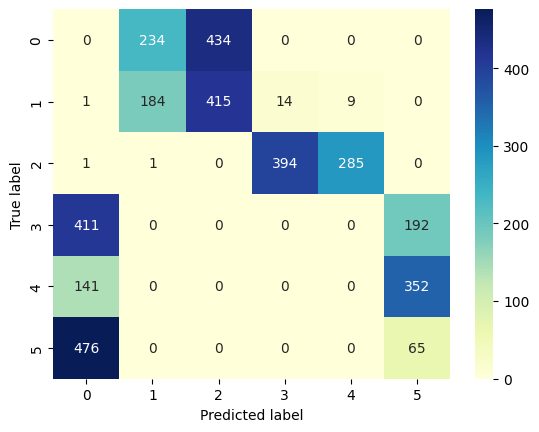

In [ ]:
# 교차표인 hmap을 열람하기 쉽게 시각화
sns.heatmap(pd.DataFrame(hmap), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
# choose_id는 각 실제 레이블(클래스)에 대해 해당 클래스를 어떤 클러스터로 선택할지 결정하는 데 사용되는 배열
# 각 행(즉, 각 실제 레이블에 대해)에서 가장 많은 값을 가지는 열(클러스터)의 인덱스를 찾아서 choose_id 배열에 저장
# 이렇게 하면 각 실제 레이블에 대해 어떤 클러스터를 선택할지 결정할 수 있게 됨
choose_id=np.argmax(hmap,axis=1)

In [ ]:
# 클러스터링 결과를 기반으로 각 클러스터의 정확도를 계산
acc=np.zeros(n_cluster)
for _k in range(n_cluster):
    TN = TP = FN = FP = 0
    for i in range(n_cluster): #predict
        for j in range(n_cluster): #labels
            val=hmap[j][i]
            if (i==_k and j==_k): TN=TN+val
            if (i==_k and j!=_k): FN=FN+val
            if (i!=_k and j==_k): FP=FP+val
            if (i!=_k and j!=_k): TP=TP+val
    acc[_k] = (TP+TN)/(TP+TN+FP+FN)

In [ ]:
# 인덱스 3의 정확도가 가장 큰 것을 확인할 수 있음
acc

array([0.52950956, 0.81324467, 0.57605985, 0.719867  , 0.78193405,
       0.71737323])

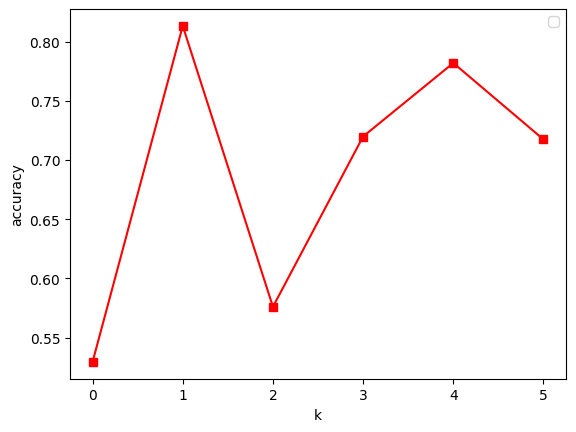

In [ ]:
# 클러스터 수 k에 따른 정확도를 그래프로 시각화하는 부분. plt.plot() 함수를 사용하여 클러스터 수에 따른 정확도를 선 그래프로 표현.
plt.plot(range(n_cluster),acc,'s-',color = 'r')
plt.xlabel("k")
plt.ylabel("accuracy")
plt.legend(loc = "best")
plt.show()

In [ ]:
# 클러스터링 및 평가 작업이 완료된 후, 실행 시간을 측정하여 출력. t0에서 시간 측정을 시작하고, t1에서 시간 측정을 종료한 후 그 차이를 계산하여 걸린 시간을 "seconds wall time"과 함께 출력.
# 이렇게 하면 알고리즘의 효율성을 평가할 수 있음
t1 = time.time()
print(t1-t0, "seconds wall time")

28.05318284034729 seconds wall time


In [ ]:
Labels = dataset['activity']
dataset = dataset.drop(['rn', 'activity'], axis = 1)

In [ ]:
#  K-Means 클러스터링 알고리즘을 적용하고 클러스터링 결과와 성능 평가를 출력
# n_clust: 클러스터의 개수로, K-Means 알고리즘에서 K 값에 해당
# data_frame: 클러스터링을 수행할 데이터셋
# true_labels: 원래의 레이블 또는 실제 활동을 나타내는 레이블

def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels
    and clustering performance parameters.

    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels

    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))
    # 클러스터링 성능을 측정하는 다양한 지표를 출력. 지표에는 이너샤(Inertㄴia), 호모지니어스성(Homogeneity), 완결성(Completeness), V-메져(V-Measure), ARI(조정된 랜드 지수), AMI(조정된 상호 정보) 및 실루엣 점수(Silhouette Score)가 포함

In [ ]:
# k_means 함수를 호출하여 K-Means 클러스터링을 수행하고, 클러스터링 결과와 성능 평가를 출력
k_means(n_clust=2, data_frame=dataset, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,0
1,1,1,0,603,493,541


inertia  homo    compl   v-meas   ARI     AMI     silhouette
85475   0.384   0.994   0.553   0.332   0.553    0.477


In [ ]:
# 클러스터링 성능 평가 및 출력
k_means(n_clust=6, data_frame=dataset, true_labels=labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,73,149,185,0,0,0
1,1,0,0,315,66,418
2,0,0,0,32,108,6
3,0,0,0,256,319,117
4,607,13,0,0,0,0
5,0,461,483,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
63731   0.583   0.620   0.601   0.466   0.600    0.150


In [ ]:
# 레이블을 이진으로 변환하는 작업을 수행. 레이블을 "not moving" (정지)를 나타내는 0과 "moving" (이동)을 나타내는 1로 이진으로 변환.
# Labels_binary 배열을 생성하고 원래 레이블 Labels를 복사
Labels_binary = Labels.copy()
# 각 레이블을 순회하면서, 레이블이 'STANDING', 'SITTING', 또는 'LAYING' 중 하나와 일치하는 경우 해당 레이블을 0으로 설정하고, 그렇지 않으면 1로 설정
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
# 최종적으로 Labels_binary 배열을 정수형으로 변환하여 이진 레이블을 생성
Labels_binary = np.array(Labels_binary.astype(int))
# 이 작업을 통해 활동 레이블이 "정지"와 "이동"으로 단순화되어 이진 분류 작업에 사용할 수 있게 됨

In [ ]:
# k-means 클러스터링 알고리즘을 사용하여 데이터를 클러스터링하고 성능 지표를 계산하는 함수를 호출
# n_clust=2: 클러스터의 수를 2개로 설정
# data_frame으로 데이터셋을, true_labels로 이진으로 변환된 레이블을 전달하여 k-means 클러스터링을 수행하고 결과를 출력
k_means(n_clust=2, data_frame=dataset, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,1970,0
1,2,1637


inertia  homo    compl   v-meas   ARI     AMI     silhouette
85475   0.994   0.994   0.994   0.998   0.994    0.477


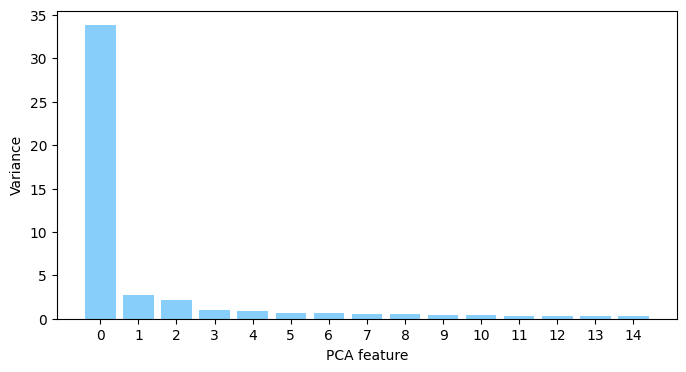

In [ ]:
#check for optimal number of features
# 주성분 분석(PCA)을 사용하여 데이터의 주요 특성을 식별하기 위한 과정을 보여줌
x_pca = PCA(random_state=123)
x_pca.fit(dataset)
features = range(x_pca.n_components_)

# 그래프는 주성분 분석을 통해 어떤 주성분이 데이터의 분산을 가장 잘 설명하는지 확인하는 데 사용됨. 그래프에서 설명된 분산이 가장 큰 주성분들을 선택하여 데이터의 차원을 줄이는 데 도움이 될 수 있음.
plt.figure(figsize=(8,4))
plt.bar(features[:15], x_pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()

In [ ]:
# 데이터 프레임을 주어진 주성분 개수로 축소하는 함수인 pca_transform을 정의
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global dataset_reduced
    dataset_reduced = pca.fit_transform(dataset)
    print('Shape of the new Data df: ' + str(dataset_reduced.shape))
    # 주어진 주성분 개수로 데이터 프레임이 축소되며, dataset_reduced 변수에 축소된 데이터가 저장. 이를 통해 데이터의 차원을 줄이고 특성을 선택할 수 있음

In [ ]:
# 데이터 프레임을 주성분 개수가 1인 PCA로 축소하는 작업을 수행. 주성분 분석을 사용하여 데이터를 1차원 공간으로 축소하고 dataset_reduced에 축소된 데이터가 저장
pca_transform(n_comp=1)
# dataset_reduced 데이터에 대해 K-평균 클러스터링을 수행. 데이터 프레임을 2개의 클러스터로 클러스터링하고 클러스터링 성능을 출력. true_labels로 Labels_binary를 사용하여 실제 레이블과 클러스터링 결과를 비교하고 성능 메트릭을 계산
k_means(n_clust=2, data_frame=dataset_reduced, true_labels=Labels_binary)
# 주성분 개수가 1인 경우, 데이터는 1차원 공간으로 축소되므로 K-평균 클러스터링은 이 1차원 데이터에서 두 개의 클러스터로 데이터를 분할하려고 시도할 것. 결과와 성능 메트릭은 이 클러스터링을 평가하는 데 사용됨.

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1970,0
1,2,1637


inertia  homo    compl   v-meas   ARI     AMI     silhouette
11485   0.994   0.994   0.994   0.998   0.994    0.828


In [ ]:
# 클러스터링 성능 평가 및 출력
# 데이터 프레임을 주성분 개수가 2인 PCA로 축소하는 작업을 수행. 주성분 분석을 사용하여 데이터를 2차원 공간으로 축소하고 dataset_reduced에 축소된 데이터가 저장
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=dataset_reduced, true_labels=Labels_binary)
# 주성분 개수가 2인 경우, 데이터는 2차원 공간으로 축소되므로 K-평균 클러스터링은 이 2차원 데이터에서 두 개의 클러스터로 데이터를 분할하려고 시도할 것

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,1970,0
1,2,1637


inertia  homo    compl   v-meas   ARI     AMI     silhouette
21264   0.994   0.994   0.994   0.998   0.994    0.748


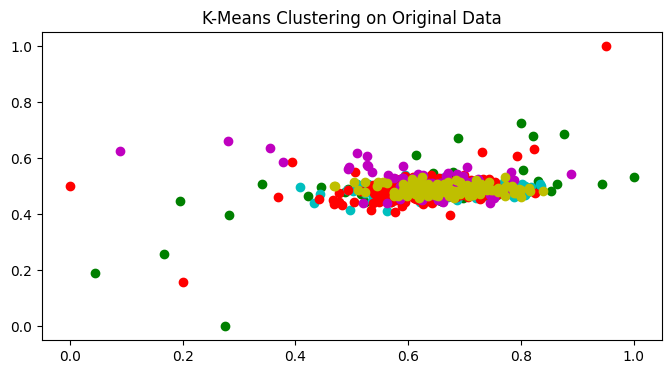

In [ ]:
# # 주어진 데이터 x와 클러스터 할당 결과 pred, 클러스터 개수 n_cluster, 그리고 클러스터마다 사용할 색상 리스트 colors를 받아 클러스터링 결과를 산포도로 시각화하는 함수
# def plot_clusters(x, pred, n_cluster, colors):
#     for i in range(n_cluster):
#         plt.scatter(x[np.where(pred==i)][:,0], x[np.where(pred==i)][:,1], c=colors[i])

# # 원본 데이터에 대한 클러스터링 결과 시각화
# plt.figure(figsize=(8, 4))
# plt.title('K-Means Clustering on Original Data')
# plot_clusters(x, pred, n_cluster, colors)
# plt.show()
# # x는 2차원 데이터로 가정됨
# # pred는 각 데이터 포인트에 할당된 클러스터의 레이블을 포함하는 배열
# # n_cluster는 클러스터의 총 개수를 나타냅니다.
# # colors는 각 클러스터에 대한 시각적 구분을 위한 색상 리스트